In [142]:
import pandas as pd

In [143]:
def loadTrainData():
    l=[]
    with open('train.csv') as file:
         lines=csv.reader(file)
         for line in lines:
             l.append(line) #42001*785
    l.remove(l[0])
    l=array(l)
    label=l[:,0]
    data=l[:,1:]
    return nomalizing(toInt(data)),toInt(label)

In [144]:
df = pd.read_csv('train.csv')
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [145]:
X = X.applymap(lambda x:1 if x>100 else 0)

In [165]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X.values,y.values)

KNeighborsClassifier(n_neighbors=15)

In [166]:
test = pd.read_csv('test.csv')
test.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [167]:
y_pred = knn.predict(test)

In [168]:
answer = pd.read_csv('KNN_benchmark.csv')
y_true = answer['Label'].values

In [169]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.8060714285714285

In [170]:
tmp = pd.DataFrame({'y_true':y_true,'y_pred':y_pred})
tmp

,y_true,y_pred
0,2,2
1,0,0
2,9,9
3,9,0
4,3,3
...,...,...
27995,9,9
27996,7,7
27997,3,3
27998,9,9


In [171]:
tmp['y_true'] == tmp['y_pred']

0         True
1         True
2         True
3        False
4         True
         ...  
27995     True
27996     True
27997     True
27998     True
27999     True
Length: 28000, dtype: bool

In [172]:
tmp['equal'] = (tmp['y_true'] == tmp['y_pred'])

In [173]:
tmp

,y_true,y_pred,equal
0,2,2,True
1,0,0,True
2,9,9,True
3,9,0,False
4,3,3,True
...,...,...,...
27995,9,9,True
27996,7,7,True
27997,3,3,True
27998,9,9,True


In [174]:
tmp.equal = tmp['equal'].map(lambda x:1 if x == True else 0)

In [175]:
tmp.equal.value_counts(normalize=True)

1    0.806071
0    0.193929
Name: equal, dtype: float64

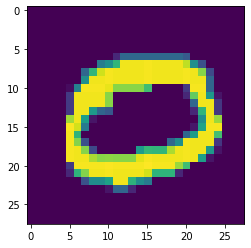

In [164]:
import matplotlib.pyplot as plt
plt.imshow(fig2)

In [184]:
df = pd.DataFrame({'Label':y_pred})
df = df.reset_index()
df['index'] = df.index.map(lambda x:x+1)
df.to_csv('answer.csv')

In [2]:
def nomalizing(array):
    m,n=shape(array)
    for i in xrange(m):
        for j in xrange(n):
            if array[i,j]!=0:
                array[i,j]=1
    return array

In [3]:
def loadTestData():
    l=[]
    with open('test.csv') as file:
         lines=csv.reader(file)
         for line in lines:
             l.append(line)
     #28001*784
    l.remove(l[0])
    data=array(l)
    return nomalizing(toInt(data))  

In [4]:
def loadTestResult():
    l=[]
    with open('knn_benchmark.csv') as file:
         lines=csv.reader(file)
         for line in lines:
             l.append(line)
     #28001*2
    l.remove(l[0])
    label=array(l)
    return toInt(label[:,1])

In [5]:
def classify(inX, dataSet, labels, k):
    inX=mat(inX)
    dataSet=mat(dataSet)
    labels=mat(labels)
    dataSetSize = dataSet.shape[0]                  
    diffMat = tile(inX, (dataSetSize,1)) - dataSet   
    sqDiffMat = array(diffMat)**2
    sqDistances = sqDiffMat.sum(axis=1)                  
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()            
    classCount={}                                      
    for i in range(k):
        voteIlabel = labels[0,sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [6]:
def saveResult(result):
    with open('result.csv','wb') as myFile:    
        myWriter=csv.writer(myFile)
        for i in result:
            tmp=[]
            tmp.append(i)
            myWriter.writerow(tmp)

In [8]:
def handwritingClassTest():
    trainData,trainLabel=loadTrainData()
    testData=loadTestData()
    testLabel=loadTestResult()
    m,n=shape(testData)
    errorCount=0
    resultList=[]
    for i in range(m):
         classifierResult = classify(testData[i], trainData, trainLabel, 5)
         resultList.append(classifierResult)
         print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, testLabel[0,i]))
         if (classifierResult != testLabel[0,i]): 
            errorCount += 1.0
    print ("\nthe total number of errors is: %d" % errorCount)
    print ("\nthe total error rate is: %f" % (errorCount/float(m)))
    saveResult(resultList)

SyntaxError: invalid syntax (<ipython-input-8-a433f79d3c55>, line 11)